# Read Cosmic Database



In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math
from PIL import Image
import seaborn as sns
%matplotlib inline

In [2]:
# Loading COSMIC database - 11M mutations with 35 features
columns_Cosmic_dtype  = {"Gene name":"str","Accession Number":"str", "Gene CDS length":"int64", "HGNC_ID":"str", "Sample_name":"str", "ID sample":"str", "ID tumour":"str", "Primary site":"str", "Site subtype_1":"str", "Site_subtype_2":"str", "Site_subtype_3":"str", "Primary_histology":"str", "Histology_subtype_1":"str", "Histology_subtype_2":"str", "Histology_subtype_3":"str", "Genome-wide_screen":"str", "Mutation ID":"str", "Mutation CD":'str', "Mutation AA":'str', "Mutation_Description":'str', "Mutation_zygosity":'str', "LOH":'str', "GRCh":"str", "Mutation_genome_position":"int64", "Mutation_strand":'str', "SNP":'str', "Resistance_Mutation":'str', "FATHMM_prediction":'str', "FATHMM_score":'str', "Mutation_somatic_status":'str', "Pubmed_PMID":'str', "ID_STUDY":'str', "Sample_Type":'str', "Tumour_origin":'str', "Age":"float"}
tmp = pd.read_table("DATA/p1rcc-olive/CosmicCompleteTargetedScreensMutantExport.tsv", sep="\t", dtype =columns_Cosmic_dtype)#, dtype=columns_Cosmic_dtype)
tmp.loc[:,"Mutation AA"] = tmp["Mutation AA"].str.replace("p.","", case=False)  
tmp.head() 

/home/sofiamr/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (17,19,20,23,24,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,SNP,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age
0,HRAS,ENST00000397596,570,5173,anw-59,705022,631633,prostate,NS,NS,...,NaN,-,NaN,NaN,NaN,1382850,NaN,surgery-fixed,NS,NaN
1,KRAS,ENST00000311936,567,6407,S38706,718383,643398,stomach,NS,NS,...,NaN,-,NaN,NaN,NaN,12163385,NaN,surgery-fixed,primary,NaN
2,FLT3,ENST00000241453,2982,3765,NOMO-1,787464,708633,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,-,NaN,NaN,NaN,12529668,NaN,cell-line,NS,NaN
3,BRAF,ENST00000288602,2301,1097,E39116,890422,808205,large_intestine,NS,NS,...,NaN,-,NaN,NaN,NaN,15247181,NaN,surgery fresh/frozen,NS,NaN
4,EPHB3,ENST00000330394,2997,3394,PD1482a,898181,815793,stomach,NS,NS,...,NaN,-,NaN,NaN,NaN,NaN,8,NS,primary,NaN


# Extracting High/Moderate impact genes from Somatic mutations

In [19]:
# Extracting High/Moderate impact genes from Somatic mutations
gene_indels = pd.read_table("~/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_indels/snpEff_genes.txt")
gene_indels[gene_indels["variants_impact_HIGH"]==1]
high_risk = list(set(gene_indels[gene_indels["variants_impact_HIGH"]==1].GeneName))
moderate_rist = list(set(gene_indels[gene_indels["variants_impact_MODERATE"]==1].GeneName))
list_of_genes_INDEL = high_risk + moderate_rist 
list_of_genes_INDEL


gene_snvs = pd.read_table("/home/sofiamr/PRCC_project/DATA/AvantiShri/results_AvantiShri/variants/snpeff_snvs/snpEff_genes.txt")
gene_snvs
Counter(gene_snvs.variants_impact_HIGH)
gene_snvs[(gene_snvs.variants_impact_HIGH>0)].GeneName# or (gene_snvs.variants_impact_MODERATE>0)]
high_risk = list(set(gene_snvs[(gene_snvs["variants_impact_HIGH"]==1) & (gene_snvs['BioType']=='protein_coding') ].GeneName))
#moderate_rist = list(set(gene_snvs[(gene_snvs["variants_impact_MODERATE"]==1) & (gene_snvs['BioType']=='protein_coding')].GeneName))
list_of_genes_SNV = high_risk #+ moderate_rist
list_of_genes_SNV

Bills_mutations = list_of_genes_SNV + list_of_genes_INDEL

#Genes mutated in Bill (See other python notebook): 
Target_genes_in_Cosmic = tmp[tmp['Gene name'].isin(Bills_mutations)]
Target_genes_in_Cosmic.groupby(["Gene name", "Primary site"])[["Primary site"]].count()

Primary site
Gene name Primary site                                    
ABI3BP    biliary_tract                                  2
          breast                                        32
          central_nervous_system                        44
          large_intestine                               35
          pancreas                                      22
ANAPC1    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                       180
          large_intestine                               11
          lung                                           2
          pancreas                                      22
ARHGAP35  kidney                                        20
          pleura                                       104
ERAP1     biliary_tract                                  2
          central_nervous_system                        44
          liver                                          2
          lung                                           1
          pancreas                                      22
FBXO42    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                        92
          large_intestine                               11
          liver                                          1
          lung                                           1
          pancreas                                      22
          upper_aerodigestive_tract                    120
FOXO3     NS                                             1
          adrenal_gland                                  1
...                                                    ...
PPIP5K2   breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          pancreas                                      22
PPP6R3    biliary_tract                                 27
          breast                                        11
          central_nervous_system                        44
          haematopoietic_and_lymphoid_tissue             1
          large_intestine                               11
          pancreas                                      22
SNW1      biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                        92
          large_intestine                               11
          liver                                          1
          pancreas                                      22
TECPR1    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          liver                                          2
          pancreas                                      22
TMEM80    central_nervous_system                        22
TRIP13    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          liver                                          1
          pancreas                                      22

[94 rows x 1 columns]

Primary site
Gene name Primary site                                    
ABI3BP    biliary_tract                                  2
          breast                                        32
          central_nervous_system                        44
          large_intestine                               35
          pancreas                                      22
ANAPC1    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                       180
          large_intestine                               11
          lung                                           2
          pancreas                                      22
ARHGAP35  kidney                                        20
          pleura                                       104
ERAP1     biliary_tract                                  2
          central_nervous_system                        44
          liver                                          2
          lung                                           1
          pancreas                                      22
FBXO42    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                        92
          large_intestine                               11
          liver                                          1
          lung                                           1
          pancreas                                      22
          upper_aerodigestive_tract                    120
FOXO3     NS                                             1
          adrenal_gland                                  1
...                                                    ...
PPIP5K2   breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          pancreas                                      22
PPP6R3    biliary_tract                                 27
          breast                                        11
          central_nervous_system                        44
          haematopoietic_and_lymphoid_tissue             1
          large_intestine                               11
          pancreas                                      22
SNW1      biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          kidney                                        92
          large_intestine                               11
          liver                                          1
          pancreas                                      22
TECPR1    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          liver                                          2
          pancreas                                      22
TMEM80    central_nervous_system                        22
TRIP13    biliary_tract                                  2
          breast                                        11
          central_nervous_system                        44
          large_intestine                               11
          liver                                          1
          pancreas                                      22

[94 rows x 1 columns]

In [4]:
#Someone needs to do the following:
### Nedd to make three more colums: from "Mutation genome position" to "Chr", "Start", "End" 
Chromosome  = tmp['Mutation genome position'].str.split(":").str[0]
coordinates = tmp['Mutation genome position'].str.split("-").str[1]
### Dont know if this works !!!

In [ ]:
Counter(Chromosome)

In [14]:
tmp['Chr'] = Chromosome
tmp['coordinates'] = coordinates

In [18]:
tmp['Mutation genome position']

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
10                             NaN
11                             NaN
12                             NaN
13                             NaN
14                             NaN
15                             NaN
16                             NaN
17                             NaN
18                             NaN
19                             NaN
20                             NaN
21                             NaN
22                             NaN
23                             NaN
24                             NaN
25                             NaN
26                             NaN
27                             NaN
28                  

#Resistance mutations

In [20]:
tmp[tmp['Resistance Mutation']=='Yes']

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age,Chr,coordinates
32851,EGFR,ENST00000275493,3633,3236,1731096,1731096,1637067,lung,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,22815900,NaN,fine needle aspirate,metastasis,NaN,NaN,NaN
32853,EGFR,ENST00000275493,3633,3236,2591383,2591383,2452343,lung,NS,NS,...,NaN,NaN,Confirmed somatic variant,27528220,NaN,NS,recurrent,NaN,NaN,NaN
32956,ABL1,ENST00000318560,3393,76,1428811,1428811,1338264,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,19260121,NaN,blood-bone marrow,primary,62.0,NaN,NaN
38012,ABL1,ENST00000318560,3393,76,1431275,1431275,1340689,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,20697894,NaN,blood-bone marrow,NS,NaN,NaN,NaN
44209,ABL1,ENST00000318560,3393,76,1351721,1351721,1261850,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Variant of unknown origin,19625707,NaN,blood-bone marrow,NS,NaN,NaN,NaN
44212,ABL1,ENST00000318560,3393,76,1431260,1431260,1340674,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,20697894,NaN,blood-bone marrow,NS,NaN,NaN,NaN
79591,ABL1,ENST00000318560,3393,76,1355286,1355286,1265367,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,19768693,NaN,blood-bone marrow,NS,NaN,NaN,NaN
81052,SMO,ENST00000249373,2364,11119,2521248,2521248,2383594,skin,face,NS,...,PATHOGENIC,0.98426,Reported in another cancer sample as somatic,25759019,NaN,surgery fresh/frozen,recurrent,NaN,7,129209307
81321,ABL1,ENST00000318560,3393,76,1498581,1498581,1421459,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Reported in another cancer sample as somatic,21239056,NaN,blood-bone marrow,NS,NaN,NaN,NaN
81534,ABL1,ENST00000318560,3393,76,1844083,1844083,1737137,haematopoietic_and_lymphoid_tissue,NS,NS,...,NaN,NaN,Variant of unknown origin,23223358,NaN,blood-bone marrow,NS,NaN,NaN,NaN


In [6]:
Counter(tmp[tmp['Resistance Mutation']=='Yes']['Gene name'])   
### 2504 resistant mutations
### We should consider this genes very carefully!!!, it can tell us about information about potential treatments!!!

Counter({'ABL1': 1270,
         'ALK': 46,
         'AR': 31,
         'BRAF': 22,
         'BTK': 45,
         'CTNNB1': 1,
         'EGFR': 519,
         'ESR1': 71,
         'FLT3': 29,
         'KIT': 289,
         'MAP2K1': 9,
         'MAP2K2': 10,
         'MET': 18,
         'MTOR': 5,
         'NF2': 2,
         'NRAS': 24,
         'PDGFRA': 71,
         'PIK3CA': 1,
         'PIK3CA_ENST00000263967': 1,
         'PTEN': 1,
         'SMO': 39})

#Pathogenic mutations

In [7]:
Counter(tmp['FATHMM prediction']['Gene name'])
#tmp[tmp['FATHMM prediction']=='Yes']

IndexError: Gene name

In [8]:
# Enlisiting columns
tmp.columns

Index(['Gene name', 'Accession Number', 'Gene CDS length', 'HGNC ID',
       'Sample name', 'ID_sample', 'ID_tumour', 'Primary site',
       'Site subtype 1', 'Site subtype 2', 'Site subtype 3',
       'Primary histology', 'Histology subtype 1', 'Histology subtype 2',
       'Histology subtype 3', 'Genome-wide screen', 'Mutation ID',
       'Mutation CDS', 'Mutation AA', 'Mutation Description',
       'Mutation zygosity', 'LOH', 'GRCh', 'Mutation genome position',
       'Mutation strand', 'SNP', 'Resistance Mutation', 'FATHMM prediction',
       'FATHMM score', 'Mutation somatic status', 'Pubmed_PMID', 'ID_STUDY',
       'Sample Type', 'Tumour origin', 'Age'],
      dtype='object')

In [9]:
tmp[['HGNC ID','Sample name','ID_sample','ID_tumour','Primary site', 'Site subtype 1', 'Site subtype 2', 'Site subtype 3',]]

,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,Site subtype 3
0,5173,anw-59,705022,631633,prostate,NS,NS,NS
1,6407,S38706,718383,643398,stomach,NS,NS,NS
2,3765,NOMO-1,787464,708633,haematopoietic_and_lymphoid_tissue,NS,NS,NS
3,1097,E39116,890422,808205,large_intestine,NS,NS,NS
4,3394,PD1482a,898181,815793,stomach,NS,NS,NS
5,3430,946477,946477,863000,stomach,NS,NS,NS
6,10050,PD1531a,753446,672416,large_intestine,NS,NS,NS
7,7010,1020065,1020065,937088,parathyroid,NS,NS,NS
8,1787,1120773,1120773,1033929,autonomic_ganglia,abdomen,NS,NS
9,3236,1148754,1148754,1061195,lung,NS,NS,NS


In [10]:
tmp[["Gene name",'Mutation AA','Mutation CDS','Mutation Description','Mutation zygosity','Mutation genome position']]

,Gene name,Mutation AA,Mutation CDS,Mutation Description,Mutation zygosity,Mutation genome position
0,HRAS,NaN,NaN,NaN,NaN,NaN
1,KRAS,NaN,NaN,NaN,NaN,NaN
2,FLT3,NaN,NaN,NaN,NaN,NaN
3,BRAF,NaN,NaN,NaN,NaN,NaN
4,EPHB3,NaN,NaN,NaN,NaN,NaN
5,ERBB2,NaN,NaN,NaN,NaN,NaN
6,RNASEL,NaN,NaN,NaN,NaN,NaN
7,MEN1,NaN,NaN,NaN,NaN,NaN
8,CDKN2A,NaN,NaN,NaN,NaN,NaN
9,EGFR,NaN,NaN,NaN,NaN,NaN


In [12]:
tmp.columns

Index(['Gene name', 'Accession Number', 'Gene CDS length', 'HGNC ID',
       'Sample name', 'ID_sample', 'ID_tumour', 'Primary site',
       'Site subtype 1', 'Site subtype 2', 'Site subtype 3',
       'Primary histology', 'Histology subtype 1', 'Histology subtype 2',
       'Histology subtype 3', 'Genome-wide screen', 'Mutation ID',
       'Mutation CDS', 'Mutation AA', 'Mutation Description',
       'Mutation zygosity', 'LOH', 'GRCh', 'Mutation genome position',
       'Mutation strand', 'SNP', 'Resistance Mutation', 'FATHMM prediction',
       'FATHMM score', 'Mutation somatic status', 'Pubmed_PMID', 'ID_STUDY',
       'Sample Type', 'Tumour origin', 'Age'],
      dtype='object')

In [11]:
Counter(tmp["ID_sample"])#,'Mutation AA','Mutation CDS',

Counter({705022: 1,
         718383: 1,
         787464: 1,
         890422: 1,
         898181: 897,
         946477: 1,
         753446: 899,
         1020065: 1,
         1120773: 1,
         1148754: 1,
         1235085: 12090,
         1235043: 12088,
         1235078: 12087,
         1235068: 1122,
         1246823: 1,
         1235106: 1122,
         1235083: 12087,
         1235079: 12088,
         1235048: 12088,
         1235084: 12089,
         1235039: 12089,
         1289410: 14,
         1312976: 17430,
         1312965: 17430,
         1312966: 17433,
         1312968: 17431,
         1312983: 17430,
         1312975: 17430,
         1292166: 2,
         1423859: 578,
         1345468: 2,
         1423742: 578,
         1504484: 1,
         1430361: 3975,
         1430350: 3975,
         1430353: 3976,
         1430348: 3975,
         1423804: 578,
         1423740: 578,
         1457565: 2,
         1509858: 17495,
         1509859: 17495,
         1509854: 17495,
     

In [6]:
Counter(tmp["GRCh"])

Counter({'38': 508444, nan: 10576863})

In [13]:
tmp[['Gene name', 'Gene CDS length', 'HGNC ID',
       'Sample name', 'ID_sample', 'ID_tumour', 'Primary site',
       'Mutation ID', 'Mutation CDS', 'Mutation AA', 'Mutation Description',
       'Mutation zygosity', 'LOH', 'GRCh', 'Mutation genome position',
       'Mutation strand', 'SNP', 'Resistance Mutation', 'FATHMM prediction',
       'FATHMM score', 'Mutation somatic status', 'ID_STUDY',
       'Sample Type', 'Tumour origin', 'Age']]

,Gene name,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Mutation ID,Mutation CDS,Mutation AA,...,Mutation strand,SNP,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,ID_STUDY,Sample Type,Tumour origin,Age
0,HRAS,570,5173,anw-59,705022,631633,prostate,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery-fixed,NS,NaN
1,KRAS,567,6407,S38706,718383,643398,stomach,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery-fixed,primary,NaN
2,FLT3,2982,3765,NOMO-1,787464,708633,haematopoietic_and_lymphoid_tissue,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,cell-line,NS,NaN
3,BRAF,2301,1097,E39116,890422,808205,large_intestine,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery fresh/frozen,NS,NaN
4,EPHB3,2997,3394,PD1482a,898181,815793,stomach,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,8,NS,primary,NaN
5,ERBB2,3768,3430,946477,946477,863000,stomach,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery-fixed,primary,NaN
6,RNASEL,2226,10050,PD1531a,753446,672416,large_intestine,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,34,NS,primary,NaN
7,MEN1,1833,7010,1020065,1020065,937088,parathyroid,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery fresh/frozen,primary,50.0
8,CDKN2A,471,1787,1120773,1120773,1033929,autonomic_ganglia,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery fresh/frozen,metastasis,42.0
9,EGFR,3633,3236,1148754,1148754,1061195,lung,NaN,NaN,NaN,...,NaN,NaN,-,NaN,NaN,NaN,NaN,surgery-fixed,NS,NaN


In [ ]:
#tmp[tmp[["Primary site"]]=='kidney']
kidney_mutation = tmp.loc[tmp['Primary site'].isin(['kidney'])]    ###Primary site is kidney = 668783

In [ ]:
kidney_mutation[["Gene name",'Mutation AA']]

In [ ]:
kidney_mutation

In [95]:
kidney_mutation['GENE_nameU'] = kidney_mutation['Gene name'].str.split("_ENS").str[0]


/home/sofiamr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [67]:
kidney_mutation

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age,GENE_nameU
68,UAP1,ENST00000367926,1518,12457,K83,1692677,1600905,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,74.0,UAP1
69,ERCC5,ENST00000355739,3561,3437,K136,1692698,1600926,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,61.0,ERCC5
70,KDM5C,ENST00000375401,4683,11114,K174,1692708,1600936,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,30.0,KDM5C
72,TOPBP1,NM_007027.2,4308,17008,K176,1692709,1600937,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,36.0,TOPBP1
73,LGR5,ENST00000266674,2724,4504,K55,1692668,1600896,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,52.0,LGR5
91,WT1,NM_024426.2,1350,12796,2431513,2431513,2294416,kidney,NS,NS,...,-,NaN,NaN,NaN,26274016,NaN,surgery-fixed,NS,NaN,WT1
114,PPP3CB,ENST00000360663,1575,9315,PD2192a,948636,865037,kidney,NS,NS,...,-,NaN,NaN,NaN,20054297,679,NS,primary,78.0,PPP3CB
117,RLIM,ENST00000332687,1875,13429,PAKMCI,2679117,2538391,kidney,NS,NS,...,-,NaN,NaN,NaN,28825729,NaN,surgery fresh/frozen,primary,2.3,RLIM
118,DROSHA,ENST00000511367,4125,17904,PADXYT,2678628,2537902,kidney,NS,NS,...,-,NaN,NaN,NaN,28825729,NaN,surgery fresh/frozen,primary,6.8,DROSHA
145,FH,ENST00000366560,1533,3700,P-0003417-T01-IM5,2719901,2578722,kidney,NS,NS,...,-,NaN,NaN,NaN,28481359,NaN,surgery-fixed,metastasis,NaN,FH


In [133]:
genes_mutated_kidney = Counter(kidney_mutation[kidney_mutation['Mutation AA'].notnull()]["GENE_nameU"])
genes_mutated_kidney_more_100 = Counter(el for el in genes_mutated_kidney.elements() if genes_mutated_kidney[el] >= 100)

In [134]:
genes_mutated_kidney_more_100 

Counter({'AMER1': 173,
         'BAP1': 152,
         'CTNNB1': 342,
         'DROSHA': 123,
         'KDM5C': 166,
         'PBRM1': 1051,
         'SETD2': 261,
         'TP53': 807,
         'VHL': 2624,
         'WT1': 299})

In [139]:
list(genes_mutated_kidney_more_100.keys())

['PBRM1',
 'VHL',
 'WT1',
 'TP53',
 'CTNNB1',
 'BAP1',
 'KDM5C',
 'AMER1',
 'SETD2',
 'DROSHA']

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age,GENE_nameU
70,KDM5C,ENST00000375401,4683,11114,K174,1692708,1600936,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,30.0,KDM5C
91,WT1,NM_024426.2,1350,12796,2431513,2431513,2294416,kidney,NS,NS,...,-,NaN,NaN,NaN,26274016,NaN,surgery-fixed,NS,NaN,WT1
118,DROSHA,ENST00000511367,4125,17904,PADXYT,2678628,2537902,kidney,NS,NS,...,-,NaN,NaN,NaN,28825729,NaN,surgery fresh/frozen,primary,6.8,DROSHA
522,AMER1,NM_152424.1,2415,26837,K133,1692697,1600925,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,47.0,AMER1
1480,CTNNB1,ENST00000349496,2346,2514,PAKMGV,2679120,2538394,kidney,NS,NS,...,-,NaN,NaN,NaN,28825729,NaN,surgery fresh/frozen,primary,6.1,CTNNB1
2026,AMER1,NM_152424.1,2415,26837,1105553,1105553,1019466,kidney,NS,NS,...,-,NaN,NaN,NaN,18311776,NaN,NS,NS,NaN,AMER1
2766,DROSHA,ENST00000511367,4125,17904,PAJNGC,2678911,2538185,kidney,NS,NS,...,-,NaN,NaN,NaN,28825729,NaN,surgery fresh/frozen,primary,4.9,DROSHA
2981,VHL,ENST00000256474,642,12687,2156159,2156159,2025169,kidney,NS,NS,...,-,NaN,NaN,NaN,24727139,NaN,surgery fresh/frozen,NS,NaN,VHL
3569,SETD2,ENST00000330022,6186,18420,PD3555a,1101204,1015556,kidney,NS,NS,...,-,NaN,NaN,NaN,20054297,255,NS,primary,66.0,SETD2
4456,WT1,NM_024426.2,1350,12796,1042705,1042705,959046,kidney,NS,NS,...,-,NaN,NaN,NaN,16575872,NaN,surgery - NOS,primary,NaN,WT1


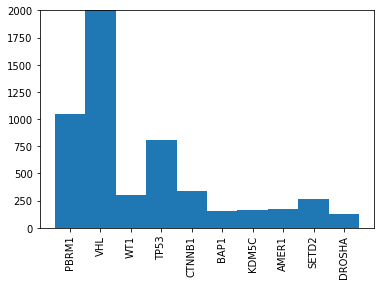

In [120]:
# plot most frequent mutation observed in the database
labels, values = zip(*genes_mutated_kidney.items())
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0, labels, rotation='vertical')
plt.ylim(0,2000)
plt.show()

In [ ]:
exac ### dataset - broad institute 
gnomad ### population refferences.

In [175]:
## Divide the number of mutations by the length of the gene:
genes_highly_mutated = list(genes_mutated_kidney_more_100.keys())
kidney_mutation.loc[kidney_mutation['GENE_nameU'].isin(genes_highly_mutated)][['GENE_nameU', 'Gene CDS length']]

,GENE_nameU,Gene CDS length
70,KDM5C,4683
91,WT1,1350
118,DROSHA,4125
522,AMER1,2415
1480,CTNNB1,2346
2026,AMER1,2415
2766,DROSHA,4125
2981,VHL,642
3569,SETD2,6186
4456,WT1,1350


In [ ]:
genes_mutated_kidney = Counter(kidney_mutation[kidney_mutation['Mutation AA'].notnull()]["GENE_nameU"])
genes_mutated_kidney_more_100 = Counter(el for el in genes_mutated_kidney.elements() if genes_mutated_kidney[el] >= 100)

In [211]:
### Get the gene length - 
test_df = pd.DataFrame.from_dict(genes_mutated_kidney_more_100, orient='index')
test_df = test_df.reset_index()
test_df = test_df.rename(columns={'index':'GENE_nameU', 0:'Patient_count'})
test_df


,GENE_nameU,Patient_count
0,PBRM1,1051
1,VHL,2624
2,WT1,299
3,TP53,807
4,CTNNB1,342
5,BAP1,152
6,KDM5C,166
7,AMER1,173
8,SETD2,261
9,DROSHA,123


In [207]:
small_df_kidney_mutation = kidney_mutation.loc[kidney_mutation['GENE_nameU'].isin(genes_highly_mutated)][['GENE_nameU', 'Gene CDS length']].drop_duplicates()
small_df_kidney_mutation

,GENE_nameU,Gene CDS length
70,KDM5C,4683
91,WT1,1350
118,DROSHA,4125
522,AMER1,2415
1480,CTNNB1,2346
2981,VHL,642
3569,SETD2,6186
9238,PBRM1,4749
9756,BAP1,2190
12476,TP53,1182


In [217]:
### FOR 
test_df2 = pd.merge(test_df, small_df_kidney_mutation, left_on='GENE_nameU', right_on='GENE_nameU')
test_df2

,GENE_nameU,Patient_count,Gene CDS length
0,PBRM1,1051,4749
1,PBRM1,1051,4809
2,PBRM1,1051,5070
3,VHL,2624,642
4,WT1,299,1350
5,WT1,299,909
6,WT1,299,1554
7,TP53,807,1182
8,TP53,807,1041
9,TP53,807,465


In [222]:
test_df2['ratio']  =  test_df2['Patient_count']/test_df2['Gene CDS length']

In [223]:
test_df2

,GENE_nameU,Patient_count,Gene CDS length,ratio
0,PBRM1,1051,4749,0.221310
1,PBRM1,1051,4809,0.218549
2,PBRM1,1051,5070,0.207298
3,VHL,2624,642,4.087227
4,WT1,299,1350,0.221481
5,WT1,299,909,0.328933
6,WT1,299,1554,0.192407
7,TP53,807,1182,0.682741
8,TP53,807,1041,0.775216
9,TP53,807,465,1.735484


In [232]:
kidney_mutation.head()

,Gene name,Accession Number,Gene CDS length,HGNC ID,Sample name,ID_sample,ID_tumour,Primary site,Site subtype 1,Site subtype 2,...,Resistance Mutation,FATHMM prediction,FATHMM score,Mutation somatic status,Pubmed_PMID,ID_STUDY,Sample Type,Tumour origin,Age,GENE_nameU
68,UAP1,ENST00000367926,1518,12457,K83,1692677,1600905,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,74.0,UAP1
69,ERCC5,ENST00000355739,3561,3437,K136,1692698,1600926,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,61.0,ERCC5
70,KDM5C,ENST00000375401,4683,11114,K174,1692708,1600936,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,30.0,KDM5C
72,TOPBP1,NM_007027.2,4308,17008,K176,1692709,1600937,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,36.0,TOPBP1
73,LGR5,ENST00000266674,2724,4504,K55,1692668,1600896,kidney,NS,NS,...,-,NaN,NaN,NaN,22138691,NaN,surgery fresh/frozen,primary,52.0,LGR5


In [273]:
Sample_id_DF = kidney_mutation[['ID_sample','ID_tumour','Gene name']].groupby(["ID_sample","Gene name"]).count()
Sample_id_DF.head(20)

ID_tumour
ID_sample Gene name           
687935    BRAF               1
          HRAS               1
          KRAS               1
          NRAS               1
687936    BRAF               1
          HRAS               1
          KRAS               1
          NRAS               1
687937    BRAF               1
          HRAS               1
          KRAS               1
          NRAS               1
687938    BRAF               1
          HRAS               1
          KRAS               1
          NRAS               1
687939    BRAF               1
          HRAS               1
          KRAS               1
          NRAS               1

In [264]:
Sample_id_DF = kidney_mutation[['ID_sample','Gene name','Mutation AA']].groupby(["ID_sample","Gene name"])

In [270]:
Sample_id_DF = kidney_mutation[['Sample name','ID_tumour','Gene name']].groupby(["Sample name","Gene name"]).count()

ID_tumour
Sample name Gene name                       
1           BARHL2                         1
            C14orf43                       1
            CRISPLD1                       1
            CST8                           1
            CTNNB1                         1
            ETV6                           1
            FRMD1                          1
            MEGF8                          1
            MPDU1                          1
            NHLRC1                         1
            NLGN2                          1
            OCA2                           1
            PBRM1                          1
            PBRM1_ENST00000296302          1
            PBRM1_ENST00000356770          1
            PCDHB1                         1
            POU4F2                         1
            RAB44                          1
            STK40                          1
            TMEM151A                       1
            TMEM44                         1
            TREH                           1
            TSC1                           1
            VHL                            2
            WT1                            1
10          BAP1                           1
            CTNNB1                         1
            ETV6                           1
            KDM5C                          1
            PBRM1                          1
...                                      ...
ws1004      SIX1                           1
ws1070      SIX1                           1
ws205       SIX1                           1
ws227       DROSHA                         1
            SIX1                           1
ws423       DGCR8                          1
ws464       SIX1                           1
ws467       DGCR8                          1
ws477       DGCR8                          1
ws483       SIX1                           1
ws507       SIX1                           1
ws508       DGCR8                          1
ws517       DROSHA                         1
ws520       MYCN                           1
ws535       DGCR8                          1
ws558       MYCN                           1
ws559       DROSHA                         1
ws574       SIX1                           1
ws608       SIX1                           1
ws614       DGCR8                          1
ws616       DROSHA                         1
ws631       DGCR8                          1
ws654       DGCR8                          1
ws658       SIX2                           1
ws659       DROSHA                         1
ws665       SIX1                           1
ws673       DROSHA                         1
ws787       MYCN                           1
ws907       DGCR8                          1
ws959       DGCR8                          1

[655926 rows x 1 columns]

In [255]:
pd.pivot_table(kidney_mutation[['ID_sample','ID_tumour','Gene name'], aggfunct=count)
        #    'ID_sample','ID_tumour','Gene name'

SyntaxError: invalid syntax (<ipython-input-255-5e49ca04f3f0>, line 1)

In [245]:
asdfds

ID_sample
687935     [ID_sample, ID_tumour, Gene name]
687936     [ID_sample, ID_tumour, Gene name]
687937     [ID_sample, ID_tumour, Gene name]
687938     [ID_sample, ID_tumour, Gene name]
687939     [ID_sample, ID_tumour, Gene name]
687940     [ID_sample, ID_tumour, Gene name]
687941     [ID_sample, ID_tumour, Gene name]
687942     [ID_sample, ID_tumour, Gene name]
687943     [ID_sample, ID_tumour, Gene name]
687944     [ID_sample, ID_tumour, Gene name]
687945     [ID_sample, ID_tumour, Gene name]
688125     [ID_sample, ID_tumour, Gene name]
688202     [ID_sample, ID_tumour, Gene name]
688203     [ID_sample, ID_tumour, Gene name]
688204     [ID_sample, ID_tumour, Gene name]
688205     [ID_sample, ID_tumour, Gene name]
688206     [ID_sample, ID_tumour, Gene name]
688207     [ID_sample, ID_tumour, Gene name]
688208     [ID_sample, ID_tumour, Gene name]
688209     [ID_sample, ID_tumour, Gene name]
688210     [ID_sample, ID_tumour, Gene name]
688211     [ID_sample, ID_tumour, Gene name]
